In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Cargar y preparar el dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizar los datos de entrada
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertir las etiquetas a one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### Baseline

Epoch 1/10
625/625 [==============================] - 42s 62ms/step - loss: 1.5108 - accuracy: 0.4627 - val_loss: 1.3603 - val_accuracy: 0.5130
Epoch 2/10
625/625 [==============================] - 36s 58ms/step - loss: 1.2030 - accuracy: 0.5753 - val_loss: 1.1807 - val_accuracy: 0.5894
Epoch 3/10
625/625 [==============================] - 38s 60ms/step - loss: 1.0754 - accuracy: 0.6235 - val_loss: 1.1106 - val_accuracy: 0.6211
Epoch 4/10
625/625 [==============================] - 37s 59ms/step - loss: 0.9816 - accuracy: 0.6565 - val_loss: 1.1049 - val_accuracy: 0.6191
Epoch 5/10
625/625 [==============================] - 43s 69ms/step - loss: 0.9140 - accuracy: 0.6787 - val_loss: 1.0517 - val_accuracy: 0.6400
Epoch 6/10
625/625 [==============================] - 39s 62ms/step - loss: 0.8414 - accuracy: 0.7086 - val_loss: 1.0655 - val_accuracy: 0.6334
Epoch 7/10
625/625 [==============================] - 43s 68ms/step - loss: 0.7872 - accuracy: 0.7268 - val_loss: 1.0640 - val_accuracy:

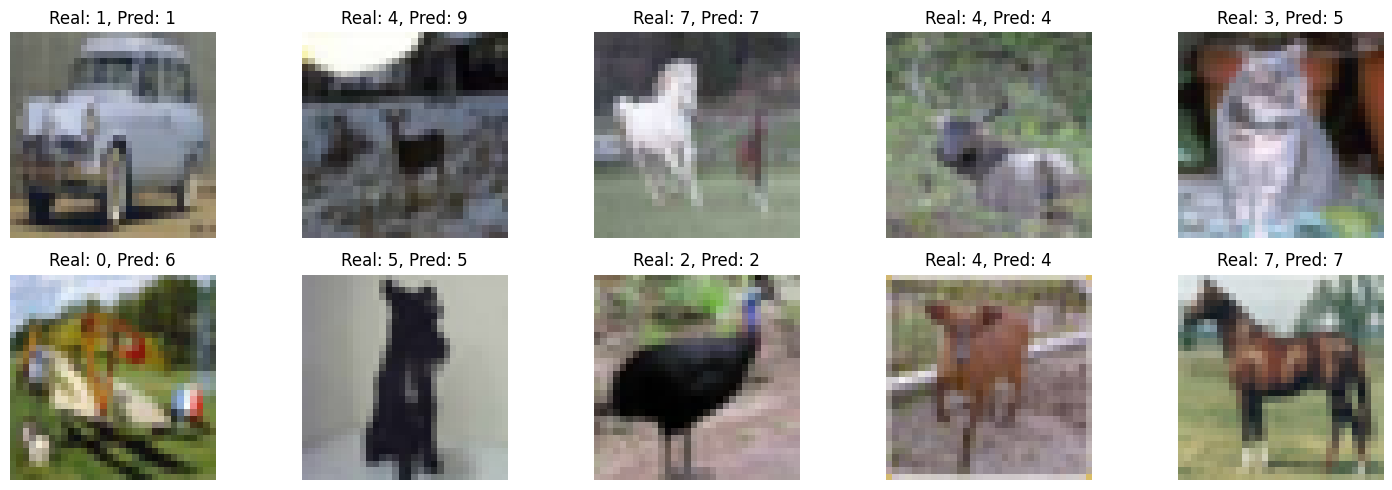

In [9]:

# Definir el modelo
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Predicción de valores
y_pred = model.predict(x_test)

# Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

# Decodificar las etiquetas
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# Seleccionar algunas imágenes aleatoriamente
indices = np.random.choice(np.arange(len(x_test)), size=10, replace=False)

# Crear la gráfica
plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[idx])
    plt.title(f'Real: {y_test_labels[idx]}, Pred: {y_pred_labels[idx]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

### Changing Architecture

Epoch 1/10
625/625 [==============================] - 226s 356ms/step - loss: 1.6103 - accuracy: 0.4108 - val_loss: 1.3111 - val_accuracy: 0.5305
Epoch 2/10
625/625 [==============================] - 249s 398ms/step - loss: 1.2132 - accuracy: 0.5677 - val_loss: 1.1167 - val_accuracy: 0.6094
Epoch 3/10
625/625 [==============================] - 235s 376ms/step - loss: 1.0372 - accuracy: 0.6323 - val_loss: 0.9530 - val_accuracy: 0.6646
Epoch 4/10
625/625 [==============================] - 214s 342ms/step - loss: 0.9186 - accuracy: 0.6768 - val_loss: 0.8848 - val_accuracy: 0.6873
Epoch 5/10
625/625 [==============================] - 191s 305ms/step - loss: 0.8302 - accuracy: 0.7070 - val_loss: 0.8998 - val_accuracy: 0.6897
Epoch 6/10
625/625 [==============================] - 199s 318ms/step - loss: 0.7507 - accuracy: 0.7360 - val_loss: 0.8502 - val_accuracy: 0.7058
Epoch 7/10
625/625 [==============================] - 210s 335ms/step - loss: 0.6885 - accuracy: 0.7558 - val_loss: 0.7774 -

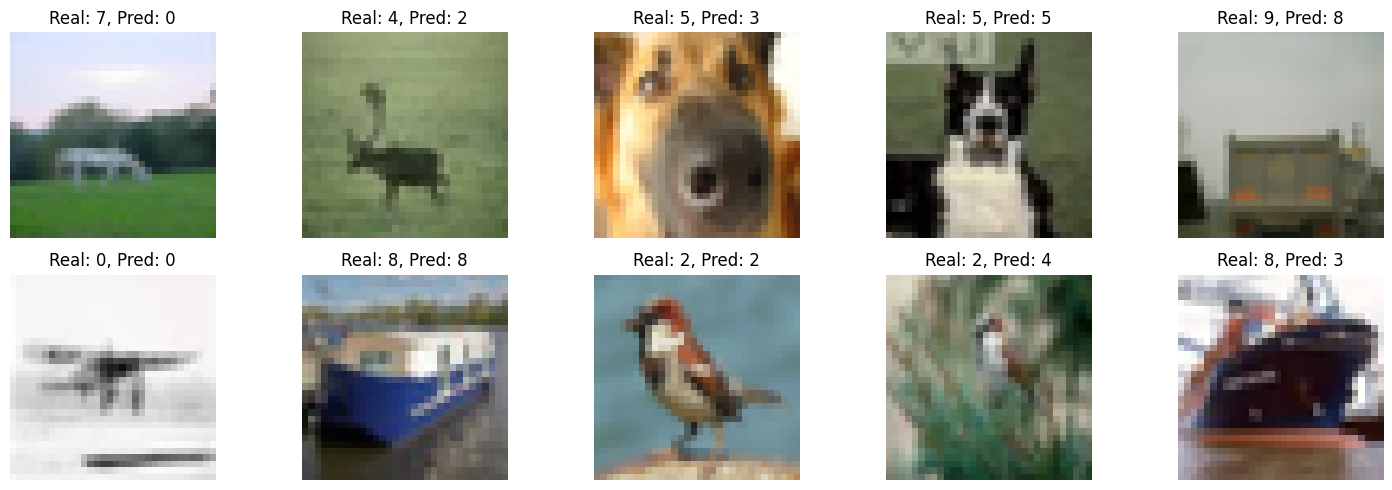

In [10]:
# Definir el modelo mejorado
improved_model = models.Sequential([
    layers.Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compilar y entrenar el modelo
improved_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
improved_history = improved_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Predicción de valores
y_pred = improved_model.predict(x_test)

# Evaluaación del modelo
improved_test_loss, improved_test_acc = improved_model.evaluate(x_test, y_test)
print(f"Improved Model Test Accuracy: {improved_test_acc}")

# Decodificar las etiquetas
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# Seleccionar algunas imágenes aleatoriamente
indices = np.random.choice(np.arange(len(x_test)), size=10, replace=False)

# Crear la gráfica
plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[idx])
    plt.title(f'Real: {y_test_labels[idx]}, Pred: {y_pred_labels[idx]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

### Hyperparameter Tuning

In [ ]:
# Función para ajustar la tasa de aprendizaje
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

callback = LearningRateScheduler(scheduler)

# Entrenamiento con más epochs, un batch size diferente y una tasa programada de aprendizaje
tuned_history = improved_model.fit(x_train, y_train, epochs=30, batch_size=128, validation_split=0.2, callbacks=[callback])

# Predicción de valores
y_pred = tuned_history.predict(x_test)

# Evaluación del modelo
tuned_test_loss, tuned_test_acc = improved_model.evaluate(x_test, y_test)
print(f"Tuned Model Test Accuracy: {tuned_test_acc}")

# Decodificar las etiquetas
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# Seleccionar algunas imágenes aleatoriamente
indices = np.random.choice(np.arange(len(x_test)), size=10, replace=False)

# Crear la gráfica
plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[idx])
    plt.title(f'Real: {y_test_labels[idx]}, Pred: {y_pred_labels[idx]}')
    plt.axis('off')
plt.tight_layout()
plt.show()